## How do i find if my data is normally distributed ?
---> You can call the sns.distplot.<br>
<br>
---> Skew function in pandas ( If <mark>pd.skew() == 0</mark>, then perfect. If negetive or positive then the data is skewed.)<br>
<br>
---> Q Q Plot 

### <i>Log Transform</i>
<br>
> Used for the data which are <mark> right skewed </mark>

In [7]:
import pandas as pd 
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day30-function-transformer/train.csv')
df = df[['Age', 'Fare', 'Survived']]

In [18]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

Text(0.5, 1.0, 'Age QQ Plot')

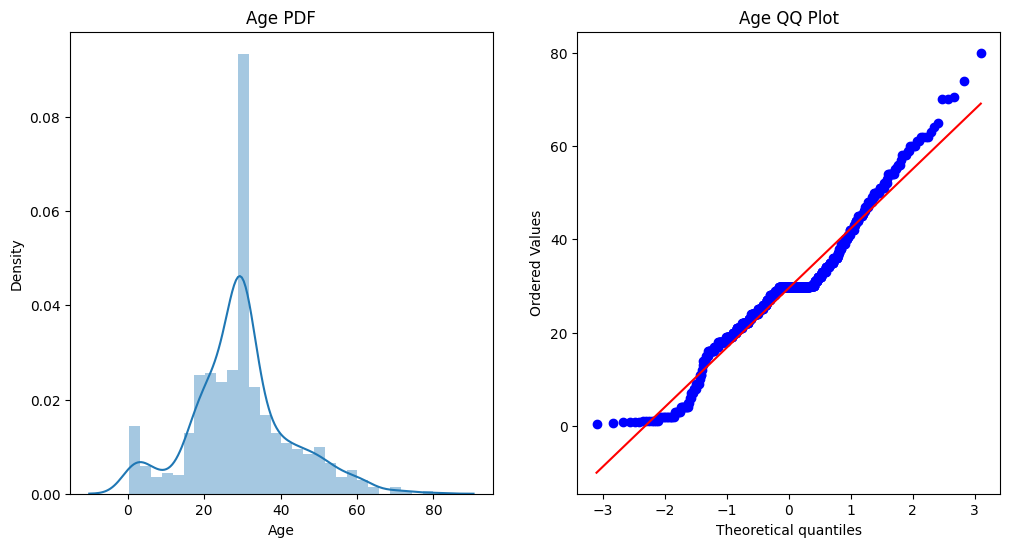

In [20]:
# Age Column 
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

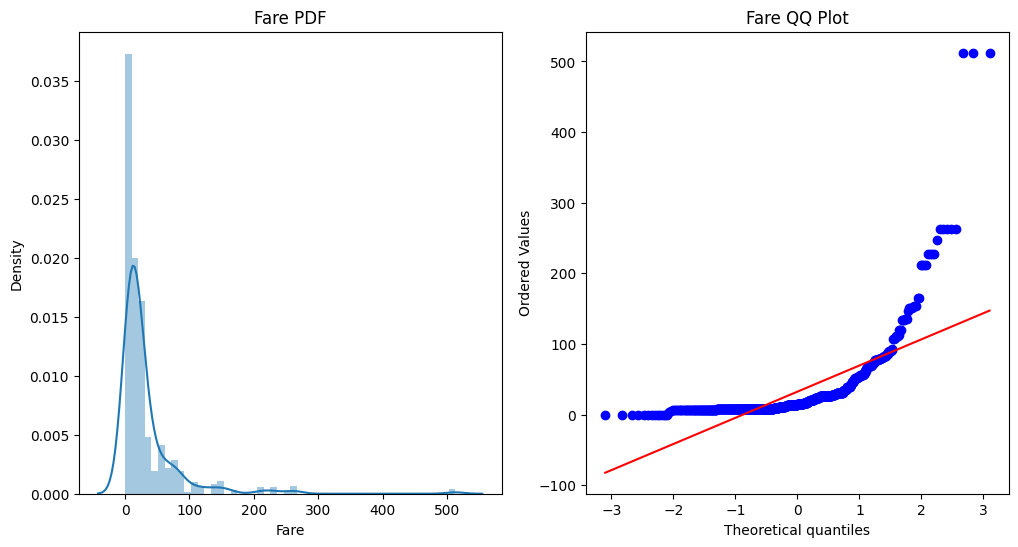

In [21]:
# Fare Column 
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')
# Right Skewed

In [22]:
trf = FunctionTransformer(np.log1p)
X_train_log = trf.fit_transform(X_train)
X_test_log = trf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_log, y_train)
y_pred = clf.predict(X_test_log)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')

clf2 = DecisionTreeClassifier()
clf2.fit(X_train_log, y_train)
y_pred = clf2.predict(X_test_log)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')

Logistic Regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6759776536312849


In [27]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_log = trf2.fit_transform(X_train)
X_test_log = trf2.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_log, y_train)
y_pred = clf.predict(X_test_log)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')

clf2 = DecisionTreeClassifier()
clf2.fit(X_train_log, y_train)
y_pred = clf2.predict(X_test_log)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')

Logistic Regression Accuracy: 0.6703910614525139
Decision Tree Accuracy: 0.6759776536312849


#### Square Transform <br>
Used for data which is left skewed.